In [ ]:
%matplotlib notebook

In [54]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

In [55]:
def cost(rd, cp, s, op, lc, w):
    return rd + cp + s*(op+lc*w)

def rev(po, uv, w, s, iv):
    return po*uv*w*s*(1+iv)

<IPython.core.display.Javascript object>


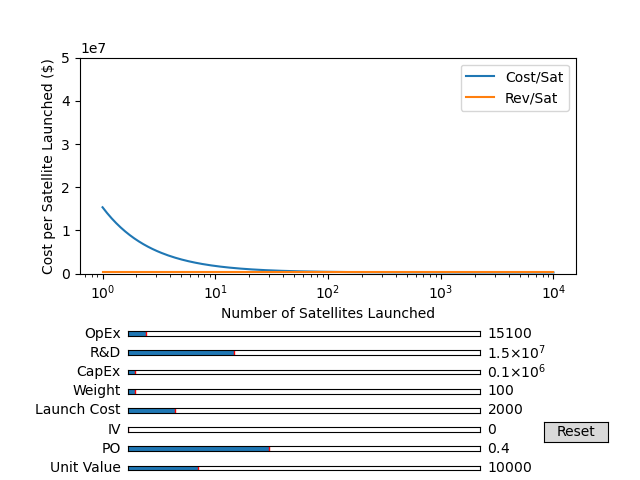

In [72]:
rd = 15000000 #R&D Cost
cp = 100000 #CapEx Cost
op = 15100 #OpEx Cost
w = 120 #Sat Weight (kg)
lc = 2000 #launch Cost ($/kg)

iv = 0 #incremental value of product
po = .4 #payload optimization
uv = 10000 #Unit Value of product ($/kg)


sats = np.logspace(0, 4, 200)
sat_cost = cost(rd, cp, sats, op, lc, w)/sats
sat_rev = rev(po, uv, w, sats, iv)/sats

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.43)

l, = ax.plot(sats, sat_cost,label="Cost/Sat")
r, = plt.plot(sats, sat_rev,label="Rev/Sat")
ax.set_xscale('log')
ax.set_ylim(0,50000000)

# # Create axes for sliders
ax_op = plt.axes([0.2, 0.3, 0.55, 0.01])
ax_rd = plt.axes([0.2, 0.26, 0.55, 0.01])
ax_cp = plt.axes([0.2, 0.22, 0.55, 0.01])
ax_w = plt.axes([0.2, 0.18, 0.55, 0.01])
ax_lc = plt.axes([0.2, 0.14, 0.55, 0.01])
ax_iv = plt.axes([0.2, 0.1, 0.55, 0.01])
ax_po = plt.axes([0.2, 0.06, 0.55, 0.01])
ax_uv = plt.axes([0.2, 0.02, 0.55, 0.01])

# # Create OpEx Slider
op_slider = Slider(ax_op, 'OpEx', 0.0, 300000, op)

# # Create R&D Slider
rd_slider = Slider(ax_rd, 'R&D', 0.0, 50000000, rd, valstep=1000000)

# # Create CapEx Slider
cp_slider = Slider(ax_cp, 'CapEx', 0.0, 5000000, cp, valstep=100000)

# # Create Weight Slider
w_slider = Slider(ax_w, 'Weight', 0.0, 5000, w, valstep=100)

# # Create Launch Cost Slider
lc_slider = Slider(ax_lc, 'Launch Cost', 0.0, 15000, lc, valstep=10)

# # Create IV Slider
iv_slider = Slider(ax_iv, 'IV', 0.0, 2, iv, valstep=.01)

# # Create PO Slider
po_slider = Slider(ax_po, 'PO', 0.0, 1, po, valstep=.1)

# # Create UV Slider
uv_slider = Slider(ax_uv, 'Unit Value', 0.0, 50000, uv, valstep=100)

# # Create fuction to be called when slider value is changed
def update(val):
    rd = rd_slider.val
    op = op_slider.val
    cp = cp_slider.val
    w = w_slider.val
    lc = lc_slider.val
    iv = iv_slider.val
    po = po_slider.val
    uv = uv_slider.val
    cost_data = cost(rd, cp, sats, op, lc, w)/sats
    rev_data = rev(po, uv, w, sats, iv)/sats
    l.set_ydata(cost_data)
    r.set_ydata(rev_data)
    ax.set_xscale('log')

# # Call update function when slider value is changed
op_slider.on_changed(update)
rd_slider.on_changed(update)
cp_slider.on_changed(update)
w_slider.on_changed(update)
lc_slider.on_changed(update)
iv_slider.on_changed(update)
po_slider.on_changed(update)
uv_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.85, 0.08, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    op_slider.reset()
    rd_slider.reset()
    cp_slider.reset()
    w_slider.reset()
    lc_slider.reset()
    iv_slider.reset()
    po_slider.reset()
    uv_slider.reset()
button.on_clicked(reset)

# display graph
plt.show()
ax.set_xlabel('Number of Satellites Launched')
ax.set_ylabel('Cost per Satellite Launched ($)')
ax.legend()

#zoom in on the intersection of the graph below to approximate the number of satellites required for breakeven intersection